In [15]:
import pandas as pd
import itertools
from sklearn.metrics import cohen_kappa_score
from scipy.stats import chi2_contingency
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

disagreement_type = "individual"
def get_cohens_kappa(df,vis_columns,remove_multi=False):
    cohenskappa_results = []

    # Pairwise comparisons
    for col1, col2 in itertools.combinations(vis_columns, 2):
        sub_df = df.copy()
        if remove_multi:
            sub_df = sub_df[sub_df.apply(lambda x: True if ("_" not in x[col1] and '_' not in x[col2]) else False, axis=1)]
        kappa = cohen_kappa_score(sub_df[col1],sub_df[col2])
        cohenskappa_results.append({
            'Column 1': col1,
            'Column 2': col2,
            'Cohen\'s Kappa': kappa
        })
    cohenskappa_results_df = pd.DataFrame(cohenskappa_results)
    return cohenskappa_results_df



def get_chisquare(df, vis_columns):
    chi2_results = []

    for col1, col2 in itertools.combinations(vis_columns, 2):
        # Drop NA values to avoid errors
        sub_df = df[[col1, col2]].dropna()

        # Create contingency table
        contingency = pd.crosstab(sub_df[col1], sub_df[col2])

        # Run Chi-Square test
        chi2, p, _, _ = chi2_contingency(contingency)

        chi2_results.append({
            'Column 1': col1,
            'Column 2': col2,
            'Chi2 Stat': chi2,
            'p-value': p
        })

    chi2_df = pd.DataFrame(chi2_results)
    return chi2_df.sort_values("p-value")
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrices_for_column_pairs(df, vis_columns):
    pairs = list(itertools.combinations(vis_columns, 2))
    n_pairs = len(pairs)

    # Determine layout: square-ish grid
    n_cols = int(np.ceil(np.sqrt(n_pairs)))
    n_rows = int(np.ceil(n_pairs / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = axes.flatten()

    for idx, (col1, col2) in enumerate(pairs):
        ax = axes[idx]
        
        # Drop rows with missing values in either column
        sub_df = df[[col1, col2]].dropna().copy()
        start_length = len(sub_df)
        # sub_df = sub_df[sub_df.apply(lambda x: True if ("_" not in x[col1] and '_' not in x[col2]) else False, axis=1)]
        filter_length = len(sub_df)
        # Get confusion matrix
        labels = sorted(set(sub_df[col1]) | set(sub_df[col2]))
        cm = confusion_matrix(sub_df[col1], sub_df[col2], labels=labels)

        # Plot heatmap
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax)
        ax.set_title(f"{col1} vs \n{col2}\n strt: {start_length}\nelim.:{filter_length-start_length}", fontsize=10)
        ax.set_xlabel(col2)
        ax.set_ylabel(col1)

    # Hide any extra axes
    for j in range(len(pairs), len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    return fig


Sleep
../exports/groundtruth/Annotated/Sleep_132_222_enriched.xlsx
Keyword Stats:
is_keyword_present
False    222
True     132
Name: count, dtype: int64
After Grouping Sentences
is_keyword_present
False    221
True     131
Name: count, dtype: int64
After removing GT Unknown
is_keyword_present
False    221
True     131
Name: count, dtype: int64
352
Metrics of dictionary


{'f1': 0.8943089430894309,
 'acc': 0.9261363636363636,
 'prec': 0.8396946564885496,
 'rec': 0.9565217391304348}

*********All********
Number of True labels in y: 115
Number of False labels in y: 237
Train size: 281, Val size: 71
Train size: 281, Val size: 71
Train size: 282, Val size: 70
Train size: 282, Val size: 70
Train size: 282, Val size: 70


,threshold,f1,accuracy,precision,recall
0,0.402,0.744,0.845,0.800,0.696
1,0.479,0.645,0.845,0.909,0.500
2,0.478,0.718,0.843,0.933,0.583
3,0.504,0.385,0.771,0.833,0.250
4,0.529,0.432,0.700,0.889,0.286


Mean Metrics of K fold cross validation of Embedder


threshold   0.478
f1          0.585
accuracy    0.801
precision   0.873
recall      0.463
Name: mean, dtype: float64

{'positive': ['beginning of shift patient a&o. sleeping in naps', 'mobility: patient sat on side of bed..than was able to transfer to large wheelchair..however was unable to get self out of wheelchair this afternoon..patient was called and was able to get patient to stand and transfer to bed..has been sleeping rest of afternoon', "heart rate dropped to 50's when asleep, and diastolic blood pressure dropped to 80's -> a-paced at 70 then 80 bpm with sbp remaining in 80's -> neo re-started at 0.25mcg/kg-min with diastolic blood pressure rising to 90's", "resp--ls coarse/bronchial in bilat upper lobes, crackles 1/2 up bilat bases, no c/o sob, on ra sat down to 90%, o2 4l on w/sat up to 98% and down to 92-93% while sleeping, patient w/non prod, non congested cough, able to talk in full sentences w/out any c/o sob, rr 20-24, non labored, patient given 40mg iv lasix for crackles/decreased sat and decreased u/o w/lg diuresis, u/o has con't ~40cc/heart rate during noc", 'slept in long naps over

,threshold,f1,accuracy,precision,recall
0,0.093,0.909,0.841,0.854,0.972
1,0.074,0.949,0.909,0.925,0.974
2,0.095,0.919,0.860,0.895,0.944


Mean Metrics of K fold cross validation of Embedder


threshold   0.088
f1          0.926
accuracy    0.870
precision   0.891
recall      0.963
Name: mean, dtype: float64

*********Without Keyword********
Number of True labels in y: 5
Number of False labels in y: 216
Train size: 147, Val size: 74
Train size: 147, Val size: 74
Train size: 148, Val size: 73


,threshold,f1,accuracy,precision,recall
0,0.770,0.000,0.986,0.000,0.000
1,0.770,0.000,0.986,0.000,0.000
2,0.566,1.000,1.000,1.000,1.000


Mean Metrics of K fold cross validation of Embedder


threshold   0.702
f1          0.333
accuracy    0.991
precision   0.333
recall      0.333
Name: mean, dtype: float64

proportion of disagreement - dictionary, embedder 0.03409090909090909


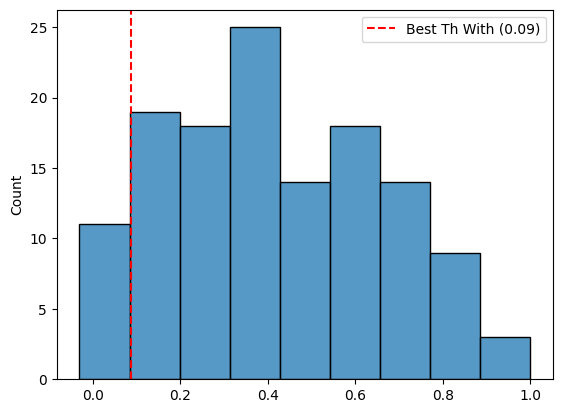

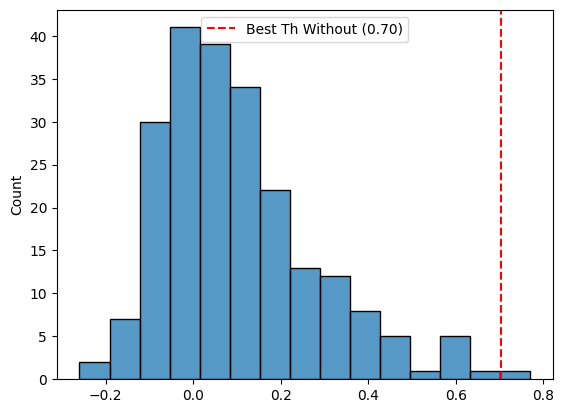

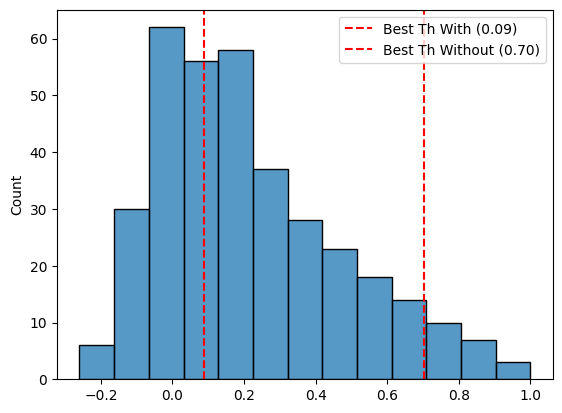

In [16]:

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from IPython.display import display
import random
random.seed(42)
from glob import glob
# Load your data
result_dict = {}






def train_model(X,y):
    results = []
    f1s, accs, precs, recs = [], [], [], []
    # Thresholds to test
    thresholds = np.linspace(min(X), max(X), 100)
    for threshold in thresholds:
        preds = (X >= threshold).astype(int)
        f1s.append(f1_score(y, preds))
        accs.append(accuracy_score(y, preds))
        precs.append(precision_score(y, preds, zero_division=0))
        recs.append(recall_score(y, preds))
        results.append({
            "threshold": threshold,
            "f1": np.mean(f1s),
            "accuracy": np.mean(accs),
            "precision": np.mean(precs),
            "recall": np.mean(recs)
        })
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    # Find the best threshold by F1 (or any other metric)
    best = results_df.loc[results_df["f1"].idxmax()]
    return best["threshold"]

def get_kfcv_results(X,y,label,K=5):
    print(label)
    print(f"Number of True labels in y: {np.sum(y == 1)}")
    print(f"Number of False labels in y: {np.sum(y == 0)}")
    kf = KFold(n_splits=K, shuffle=True, random_state=42)
    th_val, f1s_val, accs_val, precs_val, recs_val = [], [], [], [], []
    for train_idx, val_idx in kf.split(X):
        print(f"Train size: {len(train_idx)}, Val size: {len(val_idx)}")
        X_train = X[train_idx]
        y_train = y[train_idx]

        best_threshold = train_model(X_train,y_train)
        X_val = X[val_idx]
        y_val = y[val_idx]
        preds = (X_val >= best_threshold).astype(int)
        th_val.append(best_threshold)
        f1s_val.append(f1_score(y_val, preds))
        accs_val.append(accuracy_score(y_val, preds))
        precs_val.append(precision_score(y_val, preds, zero_division=0))
        recs_val.append(recall_score(y_val, preds))
    # Convert results to DataFrame
    results_df = pd.DataFrame({
        "threshold": th_val,
        "f1": f1s_val,
        "accuracy": accs_val,
        "precision": precs_val,
        "recall": recs_val
    })
    
    display(results_df)
    print("Mean Metrics of K fold cross validation of Embedder")
    display(results_df.describe().loc['mean'])
    best_th = results_df.describe().loc['mean']['threshold']
    return best_th
    
for ET in ["Sleep"]:
    print(ET)
    if ET not in result_dict:
        result_dict[ET] = {}
    file_path = glob(f"../exports/groundtruth/Annotated/{ET}*.xlsx")[0]
    print(file_path)
    df = pd.read_excel(file_path)  # or however you load it
    print("Keyword Stats:")
    print(df.is_keyword_present.value_counts())
    df = df.groupby("UID")[[f"{ET}_similarity", f"gt_{ET}", "is_keyword_present", "Sentence_dictionary","Lemma"]].agg(lambda x: max(x) if len(set(x))>1 else set(x).pop()).reset_index()
    print("After Grouping Sentences")
    print(df.is_keyword_present.value_counts())
    df.dropna(subset=f"gt_{ET}",inplace=True)
    print("After removing GT Unknown")
    print(df.is_keyword_present.value_counts())
    print(len(df))
    X = df[f"{ET}_similarity"].values
    y = df[f"gt_{ET}"].values.astype(int)
    y_dict = df.is_keyword_present.values

    print("Metrics of dictionary")
    display({"f1":f1_score(y, y_dict), "acc":accuracy_score(y, y_dict), 
    "prec":precision_score(y, y_dict, zero_division=0), "rec":recall_score(y, y_dict.astype(int))})

    X_all = X.copy()
    y_all = y.copy()
    best_th_all = get_kfcv_results(X_all, y_all, label = "*********All********", K=5)
    sentences_by_label = {
        "positive": df.loc[(df[f"gt_{ET}"] == 1) & (df[f"{ET}_similarity"]<best_th_all), "Sentence_dictionary"].tolist(),
        "negative": df.loc[(df[f"gt_{ET}"] == 0) & (df[f"{ET}_similarity"]>=best_th_all), "Sentence_dictionary"].tolist()
        }
    print(sentences_by_label)
    tpr = df.groupby(['is_keyword_present','Lemma'])[f"gt_{ET}"].mean().reset_index()
    keyword_present_tpr = tpr[tpr.is_keyword_present == 1]
    keyword_absent_tpr = tpr[(tpr.is_keyword_present == 0) & (tpr[f"gt_{ET}"]>0)]
    print(keyword_present_tpr, keyword_absent_tpr)
    kw_mask = (df.is_keyword_present == True)
    best_th_with = get_kfcv_results(X_all[kw_mask], y_all[kw_mask], label = "*********With Keyword********", K=3)
    best_th_without = get_kfcv_results(X_all[~kw_mask], y_all[~kw_mask], label = "*********Without Keyword********", K=3)   
    if disagreement_type == "individual":
        disagg_mask = (((X_all < best_th_with) & kw_mask ) | ((X_all>=best_th_without) & (~kw_mask)))
    elif disagreement_type == "together":
        disagg_mask = ((X_all<best_th_with) | (X_all>=best_th_without))
    elif disagreement_type == "anti":
        disagg_mask = ((X_all<best_th_without) | (X_all>=best_th_with))
    
    plt.figure()
    sns.histplot(X_all[kw_mask])
    plt.axvline(x=best_th_with, color='red', linestyle='--', label=f'Best Th With ({best_th_with:.2f})')
    plt.legend()
    plt.figure()
    sns.histplot(X_all[~kw_mask])
    plt.axvline(x=best_th_without, color='red', linestyle='--', label=f'Best Th Without ({best_th_without:.2f})')
    plt.legend()
    plt.figure()
    sns.histplot(X_all)
    plt.axvline(x=best_th_with, color='red', linestyle='--', label=f'Best Th With ({best_th_with:.2f})')
    plt.legend()
    plt.axvline(x=best_th_without, color='red', linestyle='--', label=f'Best Th Without ({best_th_without:.2f})')
    plt.legend()
    
    result_dict[ET]['th_all'] = best_th_all 
    result_dict[ET]['th_with'] = best_th_with
    result_dict[ET]['th_without'] = best_th_without
    result_dict[ET]['disagreement_mask'] = disagg_mask
    result_dict[ET]['disagreement_uid'] = df[disagg_mask]["UID"].tolist()    
    print("proportion of disagreement - dictionary, embedder",result_dict['Sleep']['disagreement_mask'].mean())    

(X_all[kw_mask] < best_th_with) | (X_all[~kw_mask]>=best_th_without)

Sleep_132_222_kw_False_phrase_False
****keyword present and ground truth is 1
  dict_Lemma Event_Name_LLM_Events_no_evidence_str  \
0      sleep           ['Excretion', 'Medication']   
1   sleeping                             Excretion   
2   sleeping                                 Sleep   

  Keyword_LLM_Events_no_evidence_str  GT_Sleep  count  
0                            Unknown         1      1  
1                            Unknown         1      1  
2                            Unknown         1      1  
****keyword present but ground truth is 0
  dict_Lemma Event_Name_LLM_Events_no_evidence_str  \
0     bundle                               Unknown   

  Keyword_LLM_Events_no_evidence_str  GT_Sleep  count  
0                            Unknown         0      8  
****keyword absent but ground truth is 1
  dict_Lemma Event_Name_LLM_Events_no_evidence_str  \
0  <Unknown>                                 Sleep   

  Keyword_LLM_Events_no_evidence_str  GT_Sleep  count  
0           

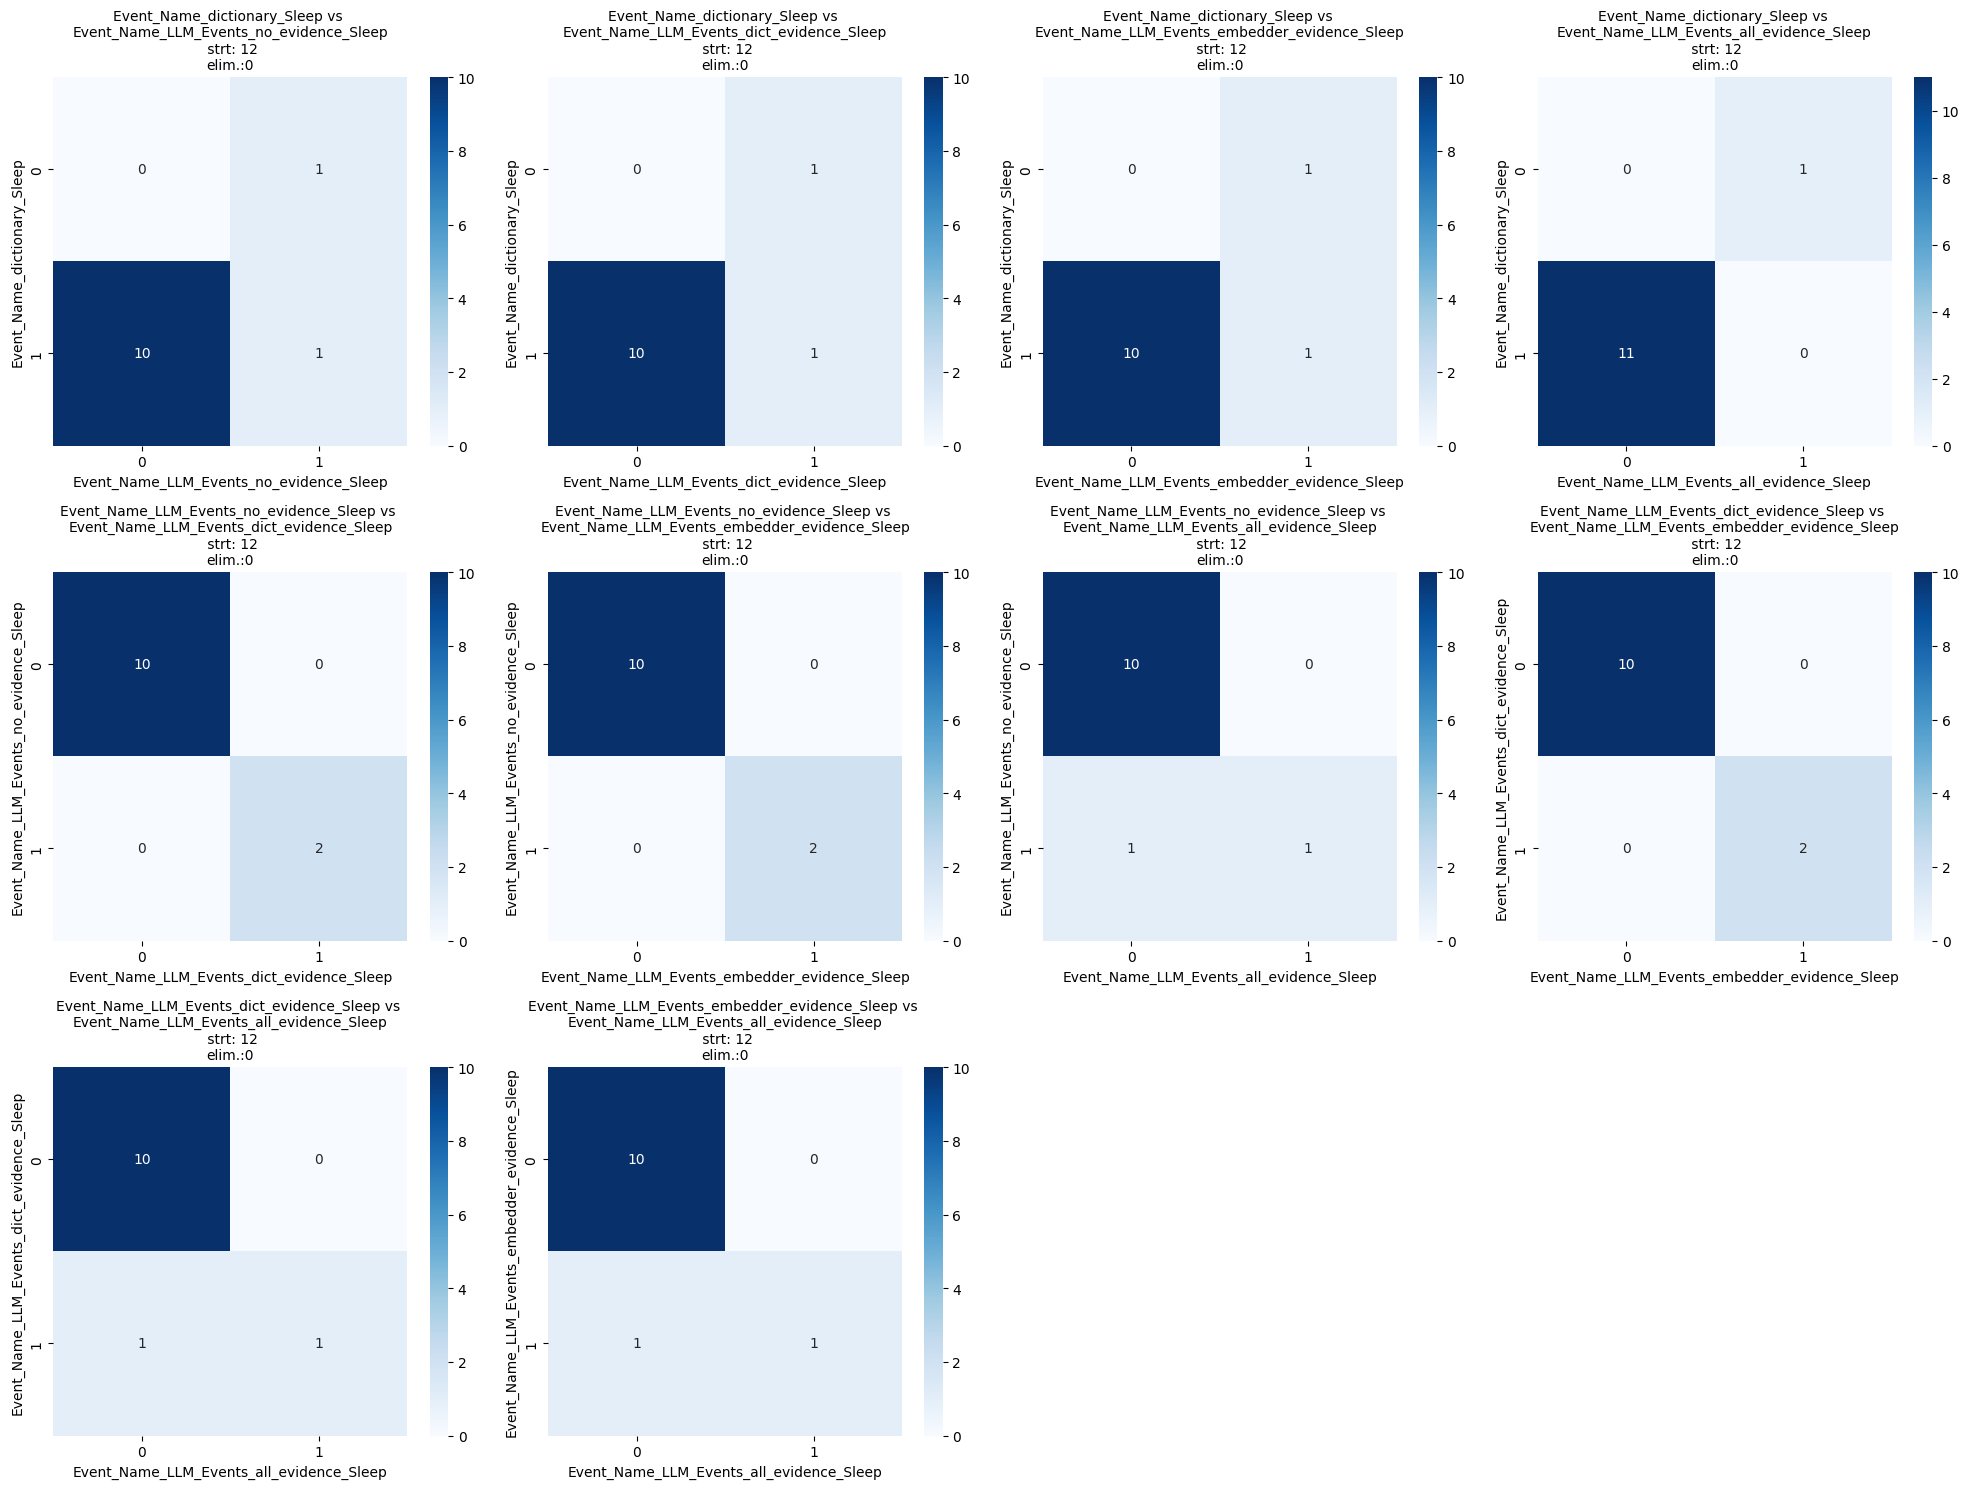

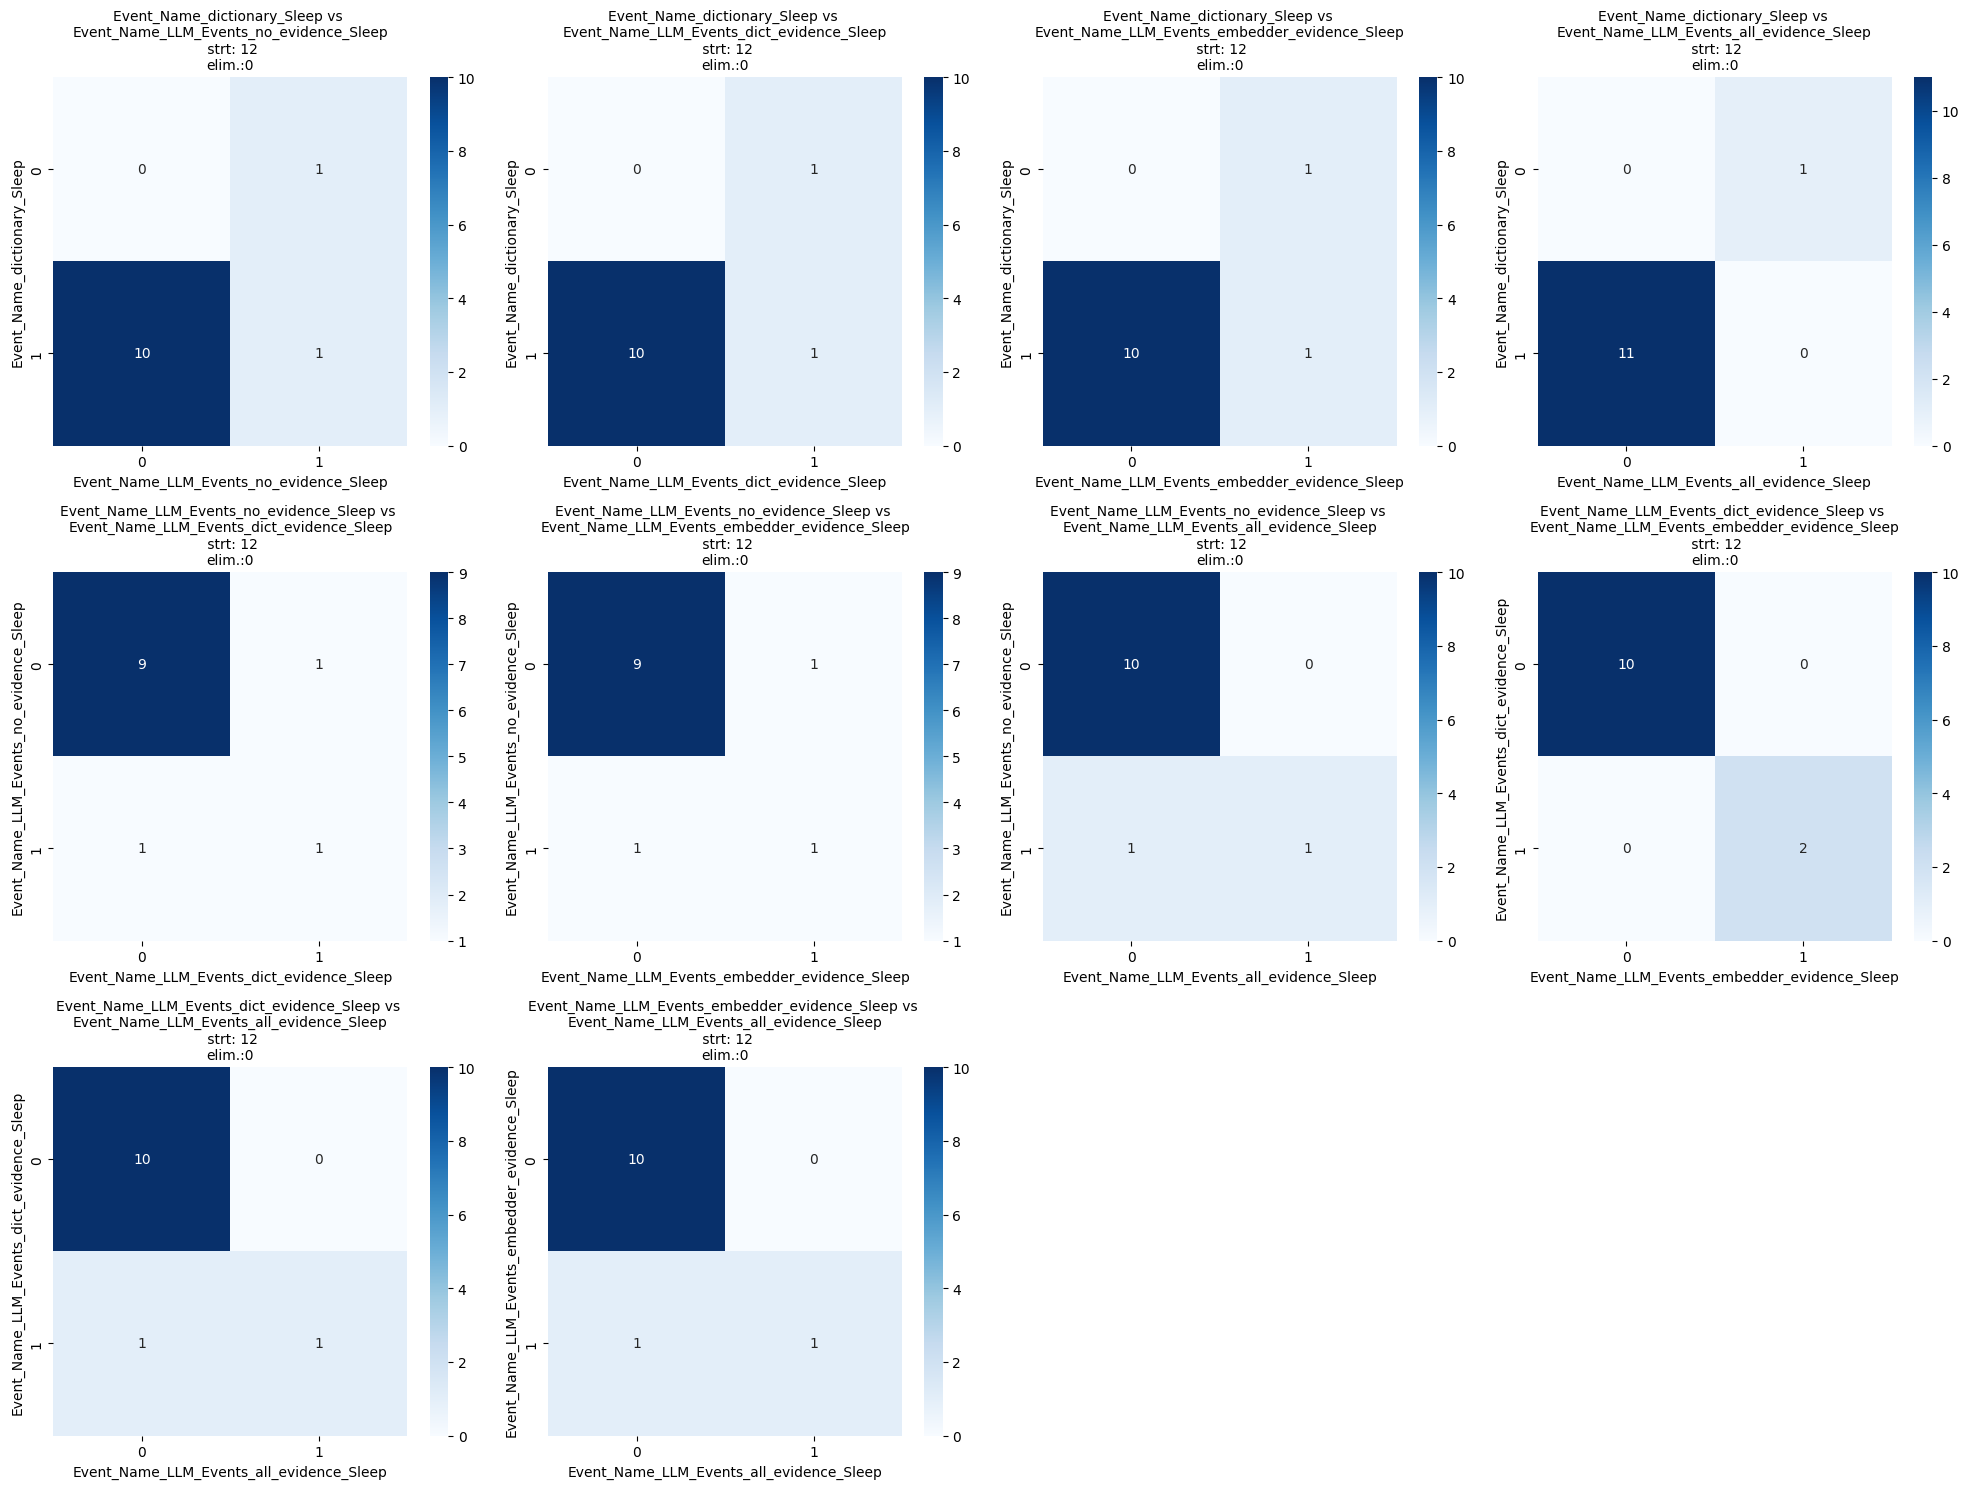

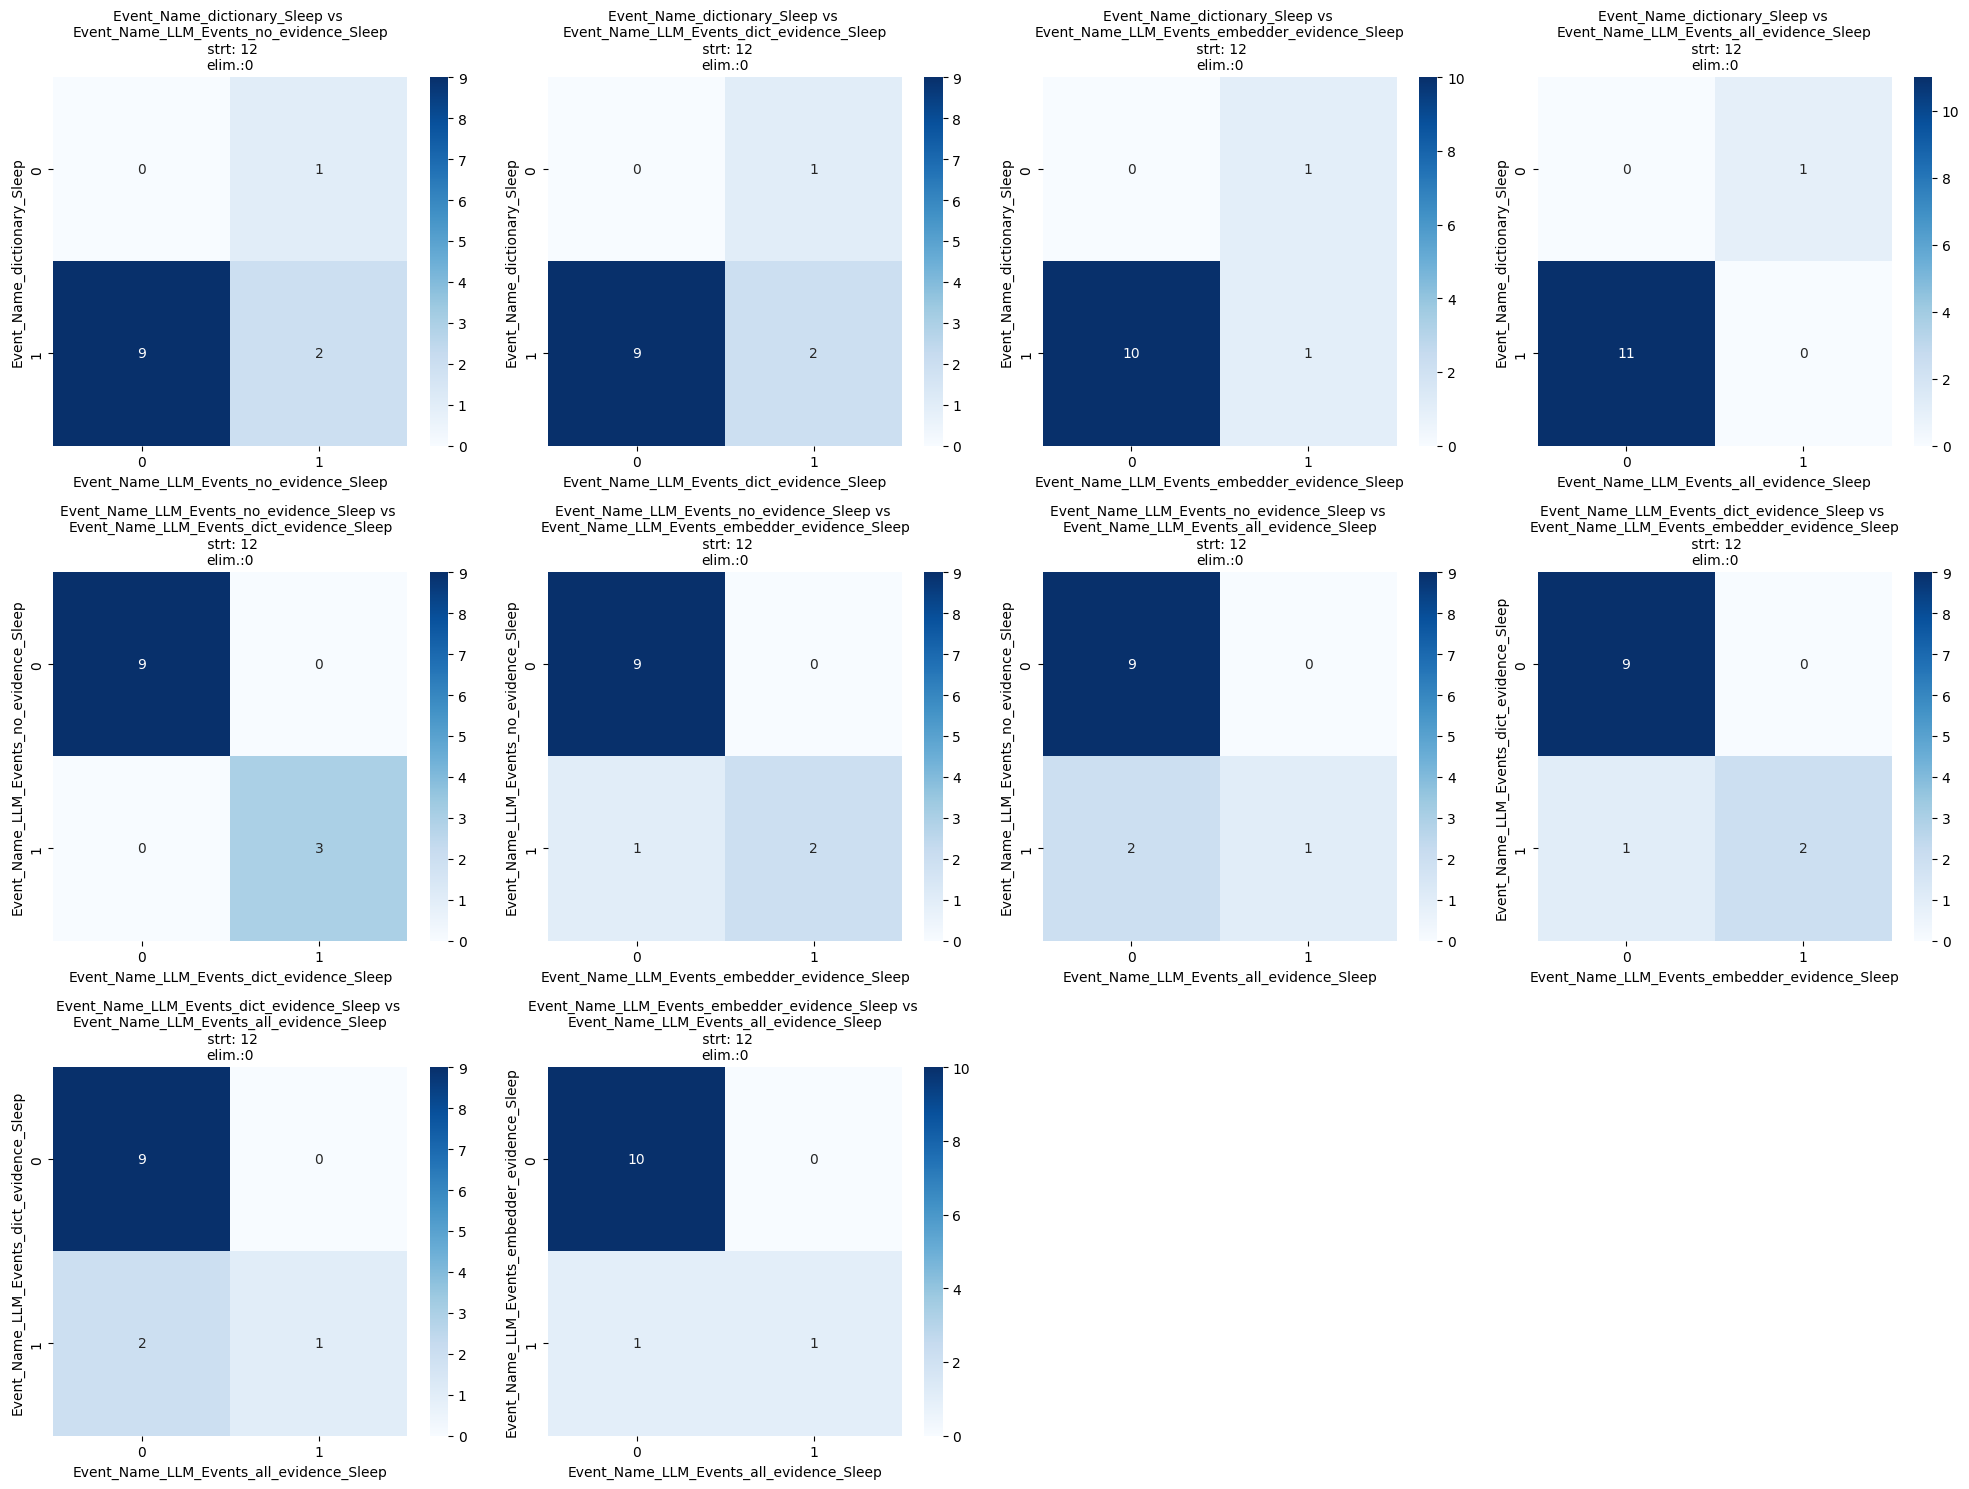

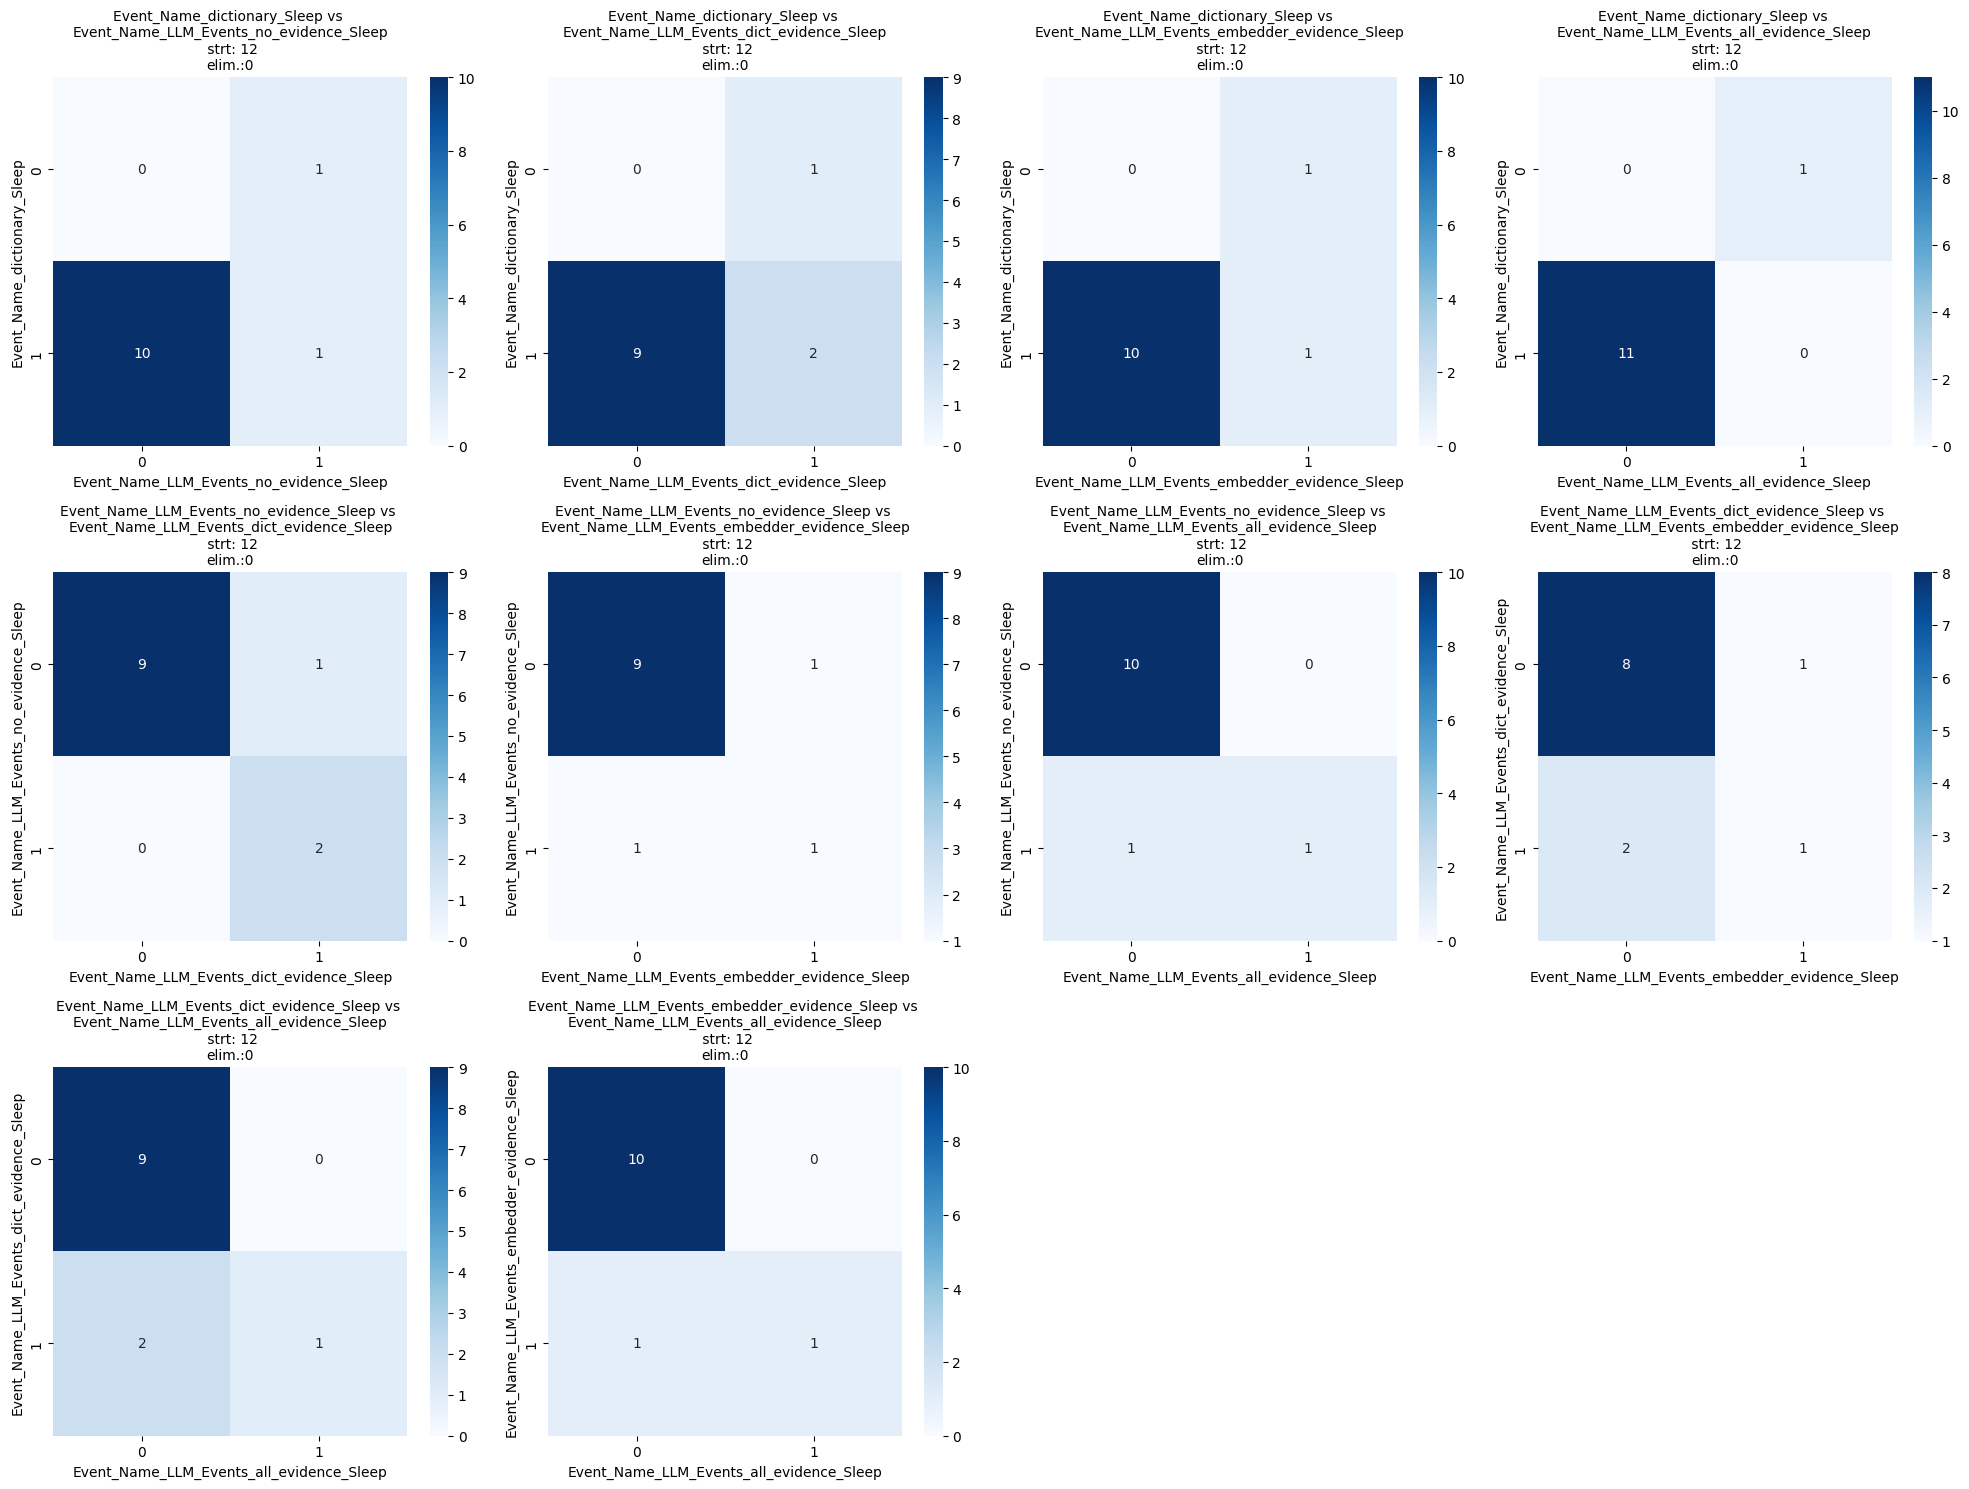

In [17]:
from glob import glob
import os
import pandas as pd
import json
analysis_type = "disagreement"

def get_event(x):
    if x["event"] != "Unknown":
        return x["event"]
    x = x.copy()  # avoid modifying original
    try:
        raw = x.get("raw_output", "")
        if isinstance(raw, str):
            parsed = json.loads(raw)
            fields = parsed.keys()
            common_to_labels = set(fields).intersection(set(["Unknown", "Eating", "Sleep", "Excretion", "Family", "Pain"])) 
            if "event_type" in fields:
                x["event"] = parsed.get("event_type")
            elif "event type" in fields:
                x["event"] = parsed.get("event type")
            elif len(common_to_labels) > 0:
                x["event"] = list(common_to_labels)
            else:
                x["event"] = "Unknown"
        else:
            x["event"] = "Unknown"
    except (json.JSONDecodeError, TypeError):
        x["event"] = "Unknown"
    return x["event"]

def get_keyword(x, event_type="Sleep"):
    x = x.copy()  # avoid modifying original
    try:
        raw = x.get("raw_output", "")
        if isinstance(raw, str):
            parsed = json.loads(raw)
            fields = parsed.keys()
            common_to_labels = set(fields).intersection(set(["Unknown", "Eating", "Sleep", "Excretion", "Family", "Pain"])) 
            if "keyword" in fields:
                x["keyword"] = parsed.get("keyword")
                if type(x["keyword"]) == dict:
                    if event_type in x["keyword"]:
                        x["keyword"] = x["keyword"][event_type]
                    else:
                        x["keyword"] = "Unknown"
            elif "keywords" in fields:
                x["keyword"] = parsed.get("keywords")
                if type(x["keyword"]) == dict:
                    if event_type in x["keyword"]:
                        x["keyword"] = x["keyword"][event_type]
                    else:
                        x["keyword"] = "Unknown"
            elif event_type in fields:
                x["keyword"] = parsed.get(event_type)
            else:
                x["keyword"] = "Unknown"
        else:
            x["keyword"] = "Unknown"
    except (json.JSONDecodeError, TypeError):
        x["keyword"] = "Unknown"
    return x["keyword"]

for ET in ["Sleep"]:
    disag_uid = result_dict[ET]['disagreement_uid']
    llm_files = glob(f"../exports/llm/{ET}/*.pkl")
    gt_file = glob(f"../exports/groundtruth/Annotated/{ET}*.xlsx")[0]
    gt_df = pd.read_excel(gt_file)
    gt_df = gt_df.dropna(subset=f"gt_{ET}")
    llm_models = ['LLM_Events_no_evidence','LLM_Events_dict_evidence','LLM_Events_embedder_evidence','LLM_Events_all_evidence']
    # gt_df = gt_df.groupby("UID")[f"gt_{ET}"].agg(lambda x: max(x)).reset_index()
    gt_df = gt_df.groupby("UID")[[f"{ET}_similarity", f"gt_{ET}", "is_keyword_present", "Sentence_dictionary","Lemma"]].agg(lambda x: max(x) if len(set(x))>1 else set(x).pop()).reset_index()
    uid_to_gt = {row['UID']:row[f"gt_{ET}"] for _,row in gt_df.iterrows()}
    uid_to_key_present = {row['UID']:row[f"is_keyword_present"] for _,row in gt_df.iterrows()}
    uid_to_lemma = {row['UID']:row[f"Lemma"] for _,row in gt_df.iterrows()}

    output_folder = f"../exports/disagreements/{ET}"
    os.makedirs(output_folder,exist_ok=True)
    for file in llm_files:
        filename = os.path.basename(file).rstrip('.pkl')
        print(filename)
        _,keyword_requested,_,phrase_requested = filename.split("_")[-4:]
        keyword_requested = eval(keyword_requested)
        # if keyword_requested == False:
        #     print("keyword not requested")
        #     continue
        phrase_requested = eval(phrase_requested)
        df = pd.read_pickle(file)
        if analysis_type == "disagreement":
            df = df[df.UID.isin(disag_uid)]
        elif analysis_type =="agreement":
            df = df[~df.UID.isin(disag_uid)]
        elif analysis_type == "all":
            df=df.copy()
        df[f"{ET}_similarity"] = df['Similarity'].apply(lambda x: x[ET])
        df["Keyword_dictionary"] = df["Keyword"]
        df["focus_event"] = ET
        df[f"GT_{ET}"] = df["UID"].apply(lambda x:uid_to_gt.get(x))
        df[f"is_keyword_present"] = df["UID"].apply(lambda x:uid_to_key_present.get(x))
        df[f"dict_Lemma"] = df["UID"].apply(lambda x:uid_to_lemma.get(x))
        df.dropna(subset=f"GT_{ET}",inplace=True)
        for col in llm_models:
            df[f"Event_Name_{col}"] = df[col].apply(get_event)
            df[f"Keyword_{col}"] = df[col].apply(lambda x:get_keyword(x,ET))
        if len(df) > 1:
            first_row = df.iloc[0]
            splittable_columns = ["Event_Name_dictionary",'Event_Name_LLM_Events_no_evidence','Event_Name_LLM_Events_dict_evidence','Event_Name_LLM_Events_embedder_evidence','Event_Name_LLM_Events_all_evidence']
            for model in llm_models:
                if phrase_requested:
                    df[f'Phrase_{model}'] = df[model].apply(lambda x: x['phrase'])
            disagreement_dfs = []
            generated_columns = []

            for col in splittable_columns:
                generated_column = f"{col}_{ET}"
                df[generated_column] = df[col].apply(lambda x: 1 if ET in x else 0)
                generated_columns.append(generated_column)
            
            f1s, accs, precs, recs = [],[],[],[]
            for col in generated_columns:
                y_gt = df[f"GT_{ET}"]
                preds = df[col]
                f1s.append(f1_score(y_gt, preds))
                accs.append(accuracy_score(y_gt, preds))
                precs.append(precision_score(y_gt, preds, zero_division=0))
                recs.append(recall_score(y_gt, preds))   
            
            for col in llm_models:
                df[f"Event_Name_{col}_str"] = df[f"Event_Name_{col}"].astype(str)
                df[f"Keyword_{col}_str"] = df[f"Keyword_{col}"].astype(str)
                print("****keyword present and ground truth is 1")
                print(df[df.is_keyword_present & df[f"GT_{ET}"]][['dict_Lemma',f'Event_Name_{col}_str',f'Keyword_{col}_str',f"GT_{ET}"]].value_counts(dropna=False).reset_index())
                print("****keyword present but ground truth is 0")
                print(df[df.is_keyword_present & ~df[f"GT_{ET}"]][['dict_Lemma',f'Event_Name_{col}_str',f'Keyword_{col}_str',f"GT_{ET}"]].value_counts(dropna=False).reset_index())
                print("****keyword absent but ground truth is 1")
                print(df[~df.is_keyword_present & df[f"GT_{ET}"]][['dict_Lemma',f'Event_Name_{col}_str',f'Keyword_{col}_str',f"GT_{ET}"]].value_counts(dropna=False).reset_index())
                print("****keyword absent but ground truth is 0")
                print(df[~df.is_keyword_present & ~df[f"GT_{ET}"]][['dict_Lemma',f'Event_Name_{col}_str',f'Keyword_{col}_str',f"GT_{ET}"]].value_counts(dropna=False).reset_index())
            
            results_df = {"technique":generated_columns, "f1_score":f1s, "accuracy":accs, "precision":precs, "recall":recs} 
            results = pd.DataFrame(results_df)   
            plot_confusion_matrices_for_column_pairs(df, vis_columns=generated_columns)
            op_path = f"{output_folder}/{analysis_type}_{disagreement_type}_{filename}.xlsx"
            df.to_excel(op_path,index=False)
            print(f"file written to {op_path}")
            print(results.to_string())
            



In [ ]:
df[[i for i in splittable_columns]]

,Event_Name_dictionary,Event_Name_LLM_Events_no_evidence,Event_Name_LLM_Events_dict_evidence,Event_Name_LLM_Events_embedder_evidence,Event_Name_LLM_Events_all_evidence
9,Sleep,{'sentence': '?switching bundles in beginning ...,{'sentence': '?switching bundles in beginning ...,{'sentence': '?switching bundles in beginning ...,{'sentence': '?switching bundles in beginning ...
11,Pain,"{'sentence': '[**11-5**], throbbing, with wors...","{'sentence': '[**11-5**], throbbing, with wors...","{'sentence': '[**11-5**], throbbing, with wors...","{'sentence': '[**11-5**], throbbing, with wors..."
17,Pain,{'sentence': '[**hospital 4778**]transferred t...,{'sentence': '[**hospital 4778**]transferred t...,{'sentence': '[**hospital 4778**]transferred t...,{'sentence': '[**hospital 4778**]transferred t...
18,Pain,{'sentence': '[**last name (stitle) 9928**] in...,{'sentence': '[**last name (stitle) 9928**] in...,{'sentence': '[**last name (stitle) 9928**] in...,{'sentence': '[**last name (stitle) 9928**] in...
23,Sleep,{'sentence': '[**name (ni) 5818**] c/o of feel...,{'sentence': '[**name (ni) 5818**] c/o of feel...,{'sentence': '[**name (ni) 5818**] c/o of feel...,{'sentence': '[**name (ni) 5818**] c/o of feel...
...,...,...,...,...,...
370,Sleep,"{'sentence': 'vap bundle', 'event': 'Unknown',...","{'sentence': 'vap bundle', 'event': 'Unknown',...","{'sentence': 'vap bundle', 'event': 'Unknown',...","{'sentence': 'vap bundle', 'event': 'Unknown',..."
374,Excretion,{'sentence': 'wasting syndrome r/t head trauma...,{'sentence': 'wasting syndrome r/t head trauma...,{'sentence': 'wasting syndrome r/t head trauma...,{'sentence': 'wasting syndrome r/t head trauma...
376,Sleep,"{'sentence': 'when asleep', 'event': 'Sleep', ...","{'sentence': 'when asleep', 'event': 'Sleep', ...","{'sentence': 'when asleep', 'event': 'Sleep', ...","{'sentence': 'when asleep', 'event': 'Sleep', ..."
378,Sleep,{'sentence': 'who stated vent rhythm with a lt...,{'sentence': 'who stated vent rhythm with a lt...,{'sentence': 'who stated vent rhythm with a lt...,{'sentence': 'who stated vent rhythm with a lt...


In [ ]:
df[f"Event_Name_Event_Name_dictionary"]

KeyError: 'Event_Name_Event_Name_dictionary'

In [ ]:
col

'Event_Name_dictionary_Excretion'

In [ ]:
len(df), len(gt_df)

(384, 384)

In [ ]:
gt_df.columns

Index(['UID', 'gt_Excretion'], dtype='object')

In [ ]:
ET="Sleep"
gt_df = pd.read_excel(f"/home/asusaiyah/data/tactics_storage/projects/event_log_from_text/exports/groundtruth/Annotated/{ET}_155_233.xlsx")
df_both = pd.read_pickle("../exports/dictionary_biolord_features.pkl")

In [ ]:
gt_df.groupby("UID")[f"gt_{ET}"].agg(lambda x: max(x)).reset_index().columns

Index(['UID', 'gt_Sleep'], dtype='object')

In [ ]:
gt_df.UID.value_counts()

UID
1650584_0001    2
1556948_0008    2
1502804_0033    2
1378912_0017    2
1546094_0006    1
               ..
1277467_0004    1
1491102_0016    1
1530704_0013    1
1314037_0003    1
1439704_0001    1
Name: count, Length: 384, dtype: int64

In [ ]:
filename = os.path.basename(file)
filename

'combined_kw_present_not_present_sampled_df_kw_True_phrase_True.pkl'

In [ ]:
df.columns

Index(['UID', 'ROW_ID', 'Sent_ID', 'HADM_ID', 'CHARTTIME_dictionary',
       'STORETIME_dictionary', 'Sentence_dictionary', 'Event_Name_dictionary',
       'Keyword', 'Lemma', 'CGID_dictionary', 'Time_dictionary',
       'CHARTTIME_biolord', 'STORETIME_biolord', 'Sentence_biolord',
       'Event_Name_biolord', 'CGID_biolord', 'Similarity', 'Eating_similarity',
       'Excretion_similarity', 'Family_similarity', 'Pain_similarity',
       'Sleep_similarity', 'Time_biolord', 'Event_Name_dictionary_multi',
       'sampling_weight', 'is_keyword_present', 'gt_Sleep', 'Keyword_set',
       'Event_set', 'LLM_Events_no_evidence', 'LLM_Events_dict_evidence',
       'LLM_Events_embedder_evidence', 'LLM_Events_all_evidence',
       'Event_Name_LLM_Events_no_evidence',
       'Event_Name_LLM_Events_dict_evidence',
       'Event_Name_LLM_Events_embedder_evidence',
       'Event_Name_LLM_Events_all_evidence'],
      dtype='object')

In [ ]:
eval("True")

True

In [ ]:
os.path.basename(filename).rstrip('.pkl').split("_")[-4:]

['kw', 'True', 'phrase', 'True']

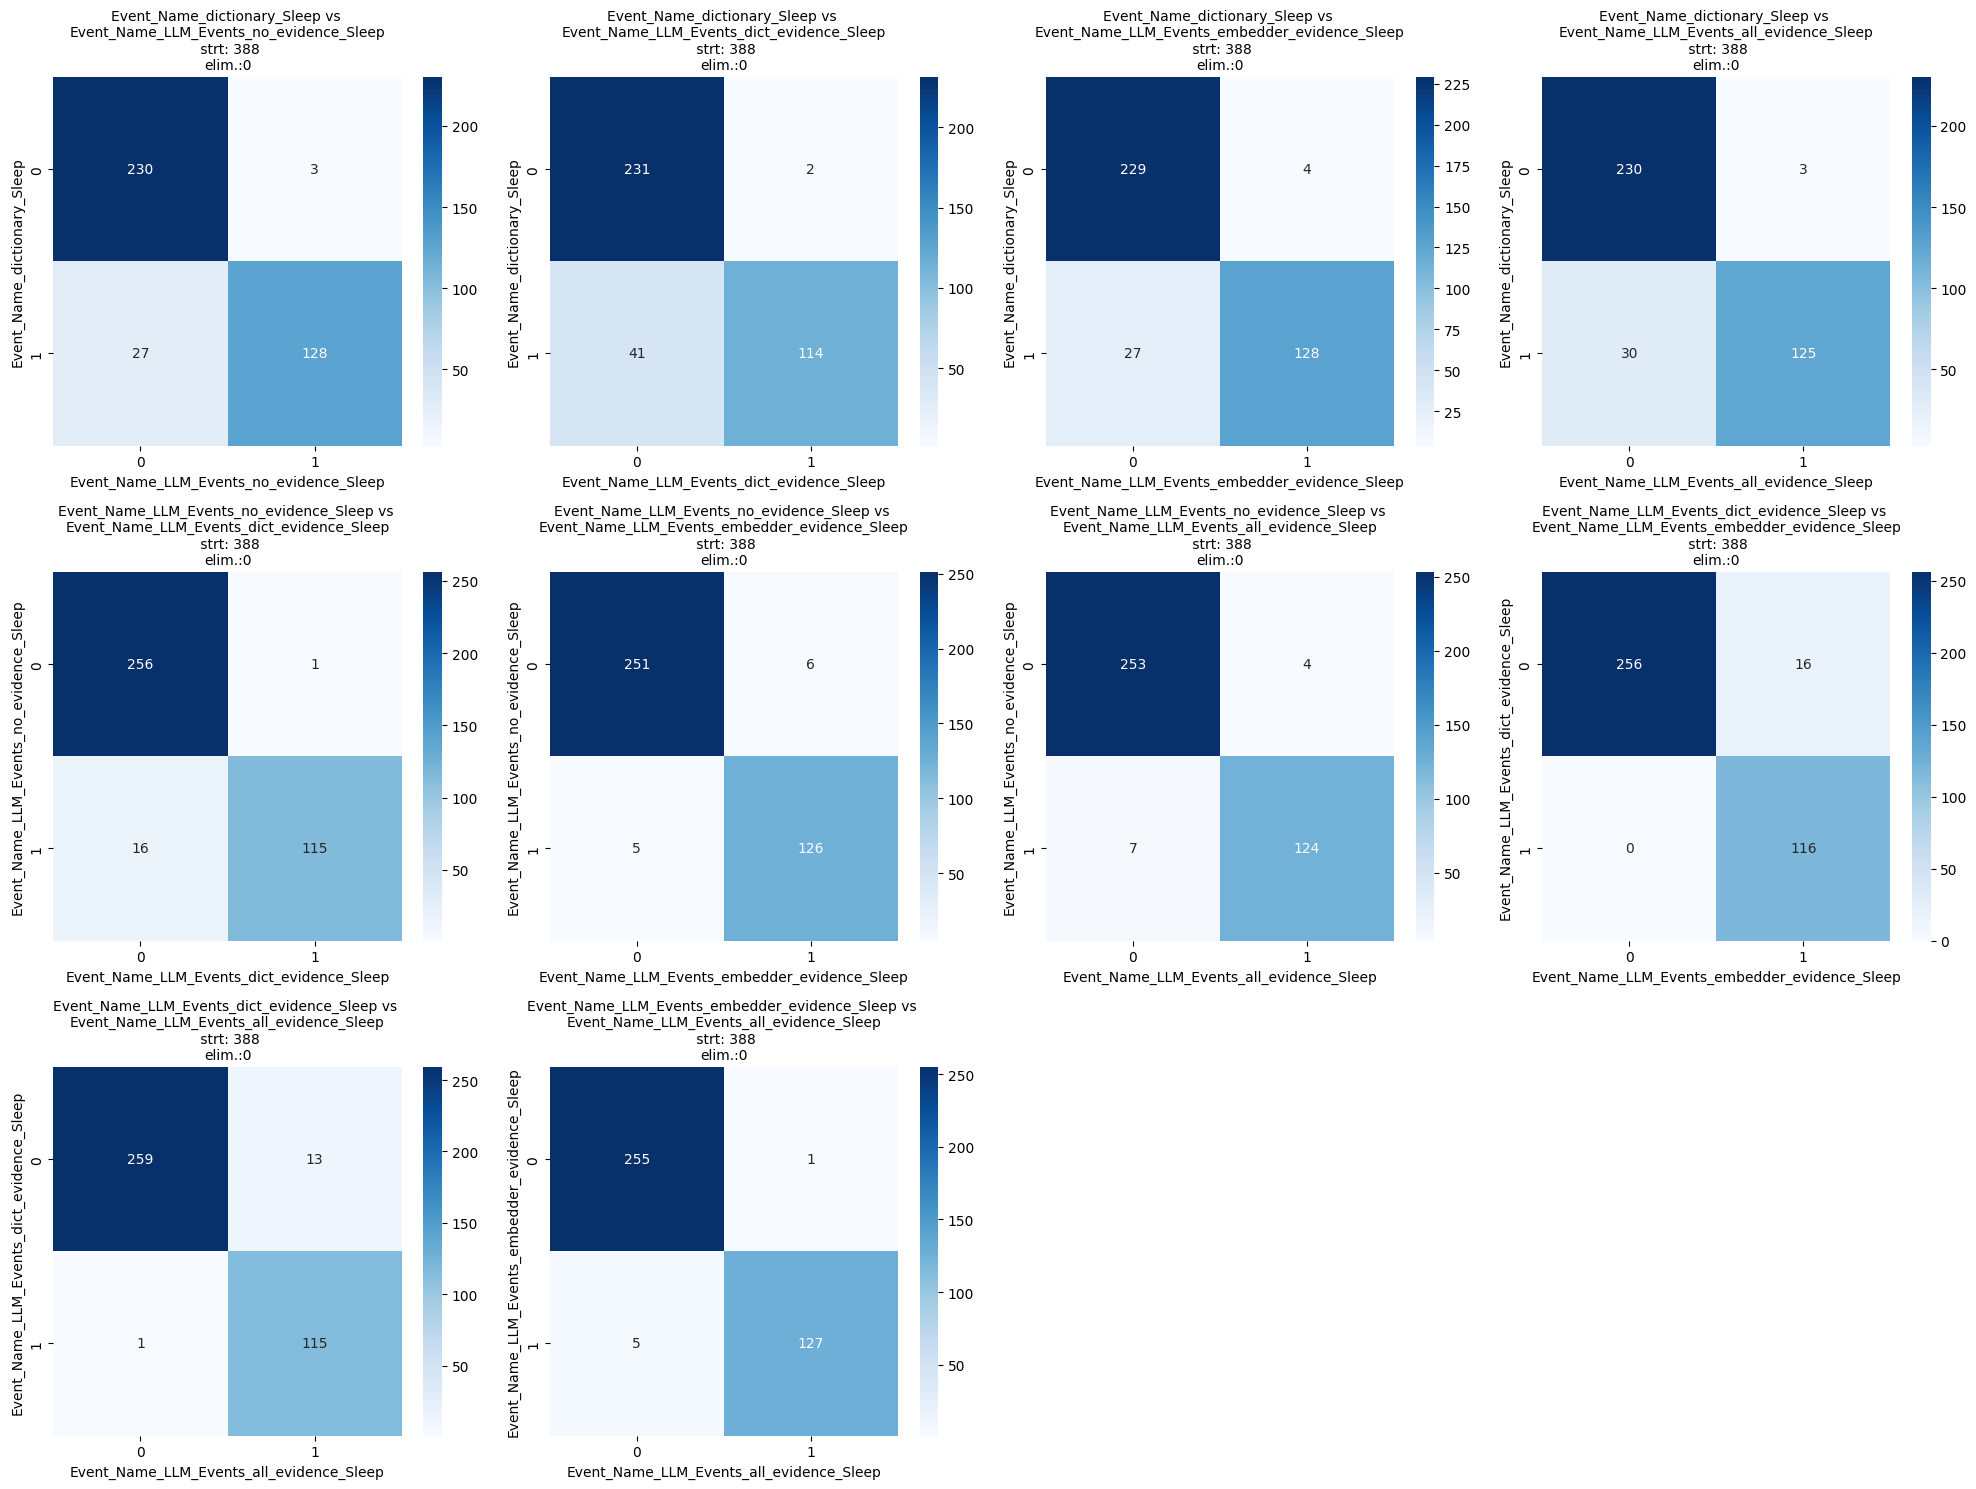

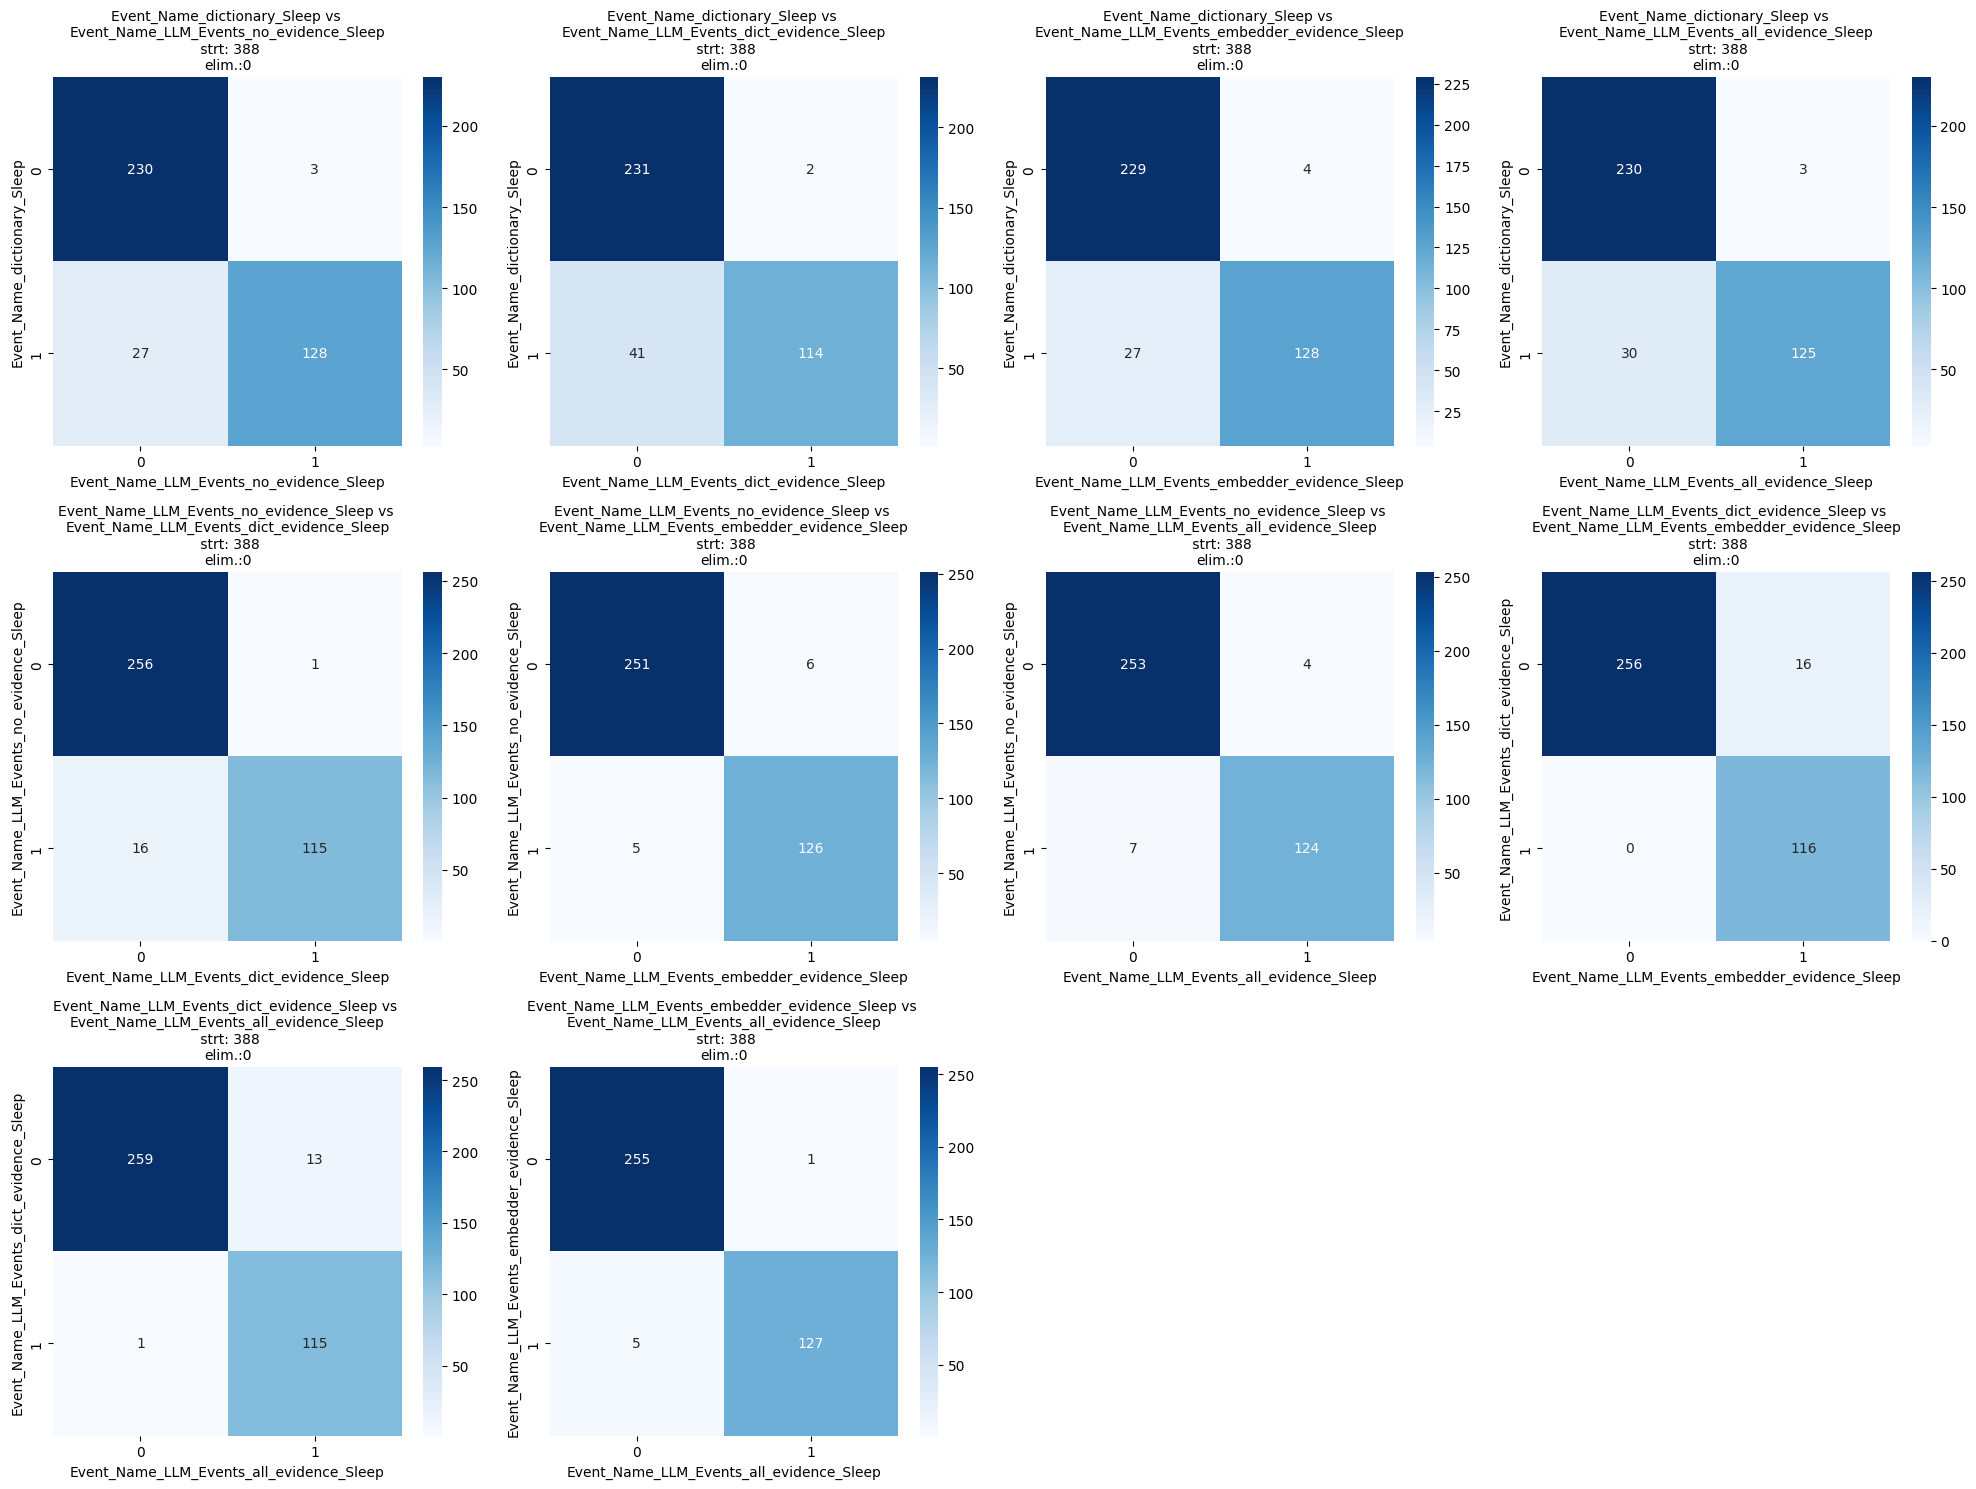

In [ ]:

event_types = ["Pain", "Sleep", "Excretion", "Eating", "Family"]
vis_columns = ['Event_Name_dictionary','Event_Name_LLM_Events_no_evidence','Event_Name_LLM_Events_dict_evidence','Event_Name_LLM_Events_embedder_evidence','Event_Name_LLM_Events_all_evidence']

splittable_columns = ["Event_Name_dictionary",'Event_Name_LLM_Events_no_evidence','Event_Name_LLM_Events_dict_evidence','Event_Name_LLM_Events_embedder_evidence','Event_Name_LLM_Events_all_evidence']
disagreement_dfs = []
generated_columns = []
for file_name in ["only_event_mention","no_particular_event_mention"]:
    disagreement_df = pd.read_pickle(f"../exports/disagreements/{file_name}.pkl")
    
    if file_name == "only_event_mention":
        disagreement_type = "keyword present but embedder low"
        disagreement_df['disagreement_type'] = disagreement_type
        disagreement_df['present/absent_keyword_type'] = disagreement_df["Event_Name_dictionary"].apply(lambda x: set(x).pop())
    elif file_name == "no_particular_event_mention":
        disagreement_type = "keyword absent but embedder high"
        disagreement_df['disagreement_type'] = disagreement_type
        disagreement_df['present/absent_keyword_type'] = disagreement_df.apply(lambda row: [i for i in event_types if (i not in row['Event_Name_dictionary'] and row['Similarity'][i]>=0.2)], axis=1)
    if len(disagreement_df)<=1:
        continue
    print(file_name)
    for col in vis_columns:
        disagreement_df[col] = disagreement_df[col].apply(lambda x: "_".join(tuple(set(x))) if type(x)==list else x)
        disagreement_df[f"{col}_multi"] = disagreement_df[col].apply(lambda x: {i: x.count(i) if isinstance(x, list) else 0 for i in event_types})
        print(disagreement_df[f"{col}_multi"])
    for event_type in event_types:
        for col in splittable_columns:
            generated_column = f"{col}_{event_type}"
            disagreement_df[generated_column] = disagreement_df[col].apply(lambda x: 1 if event_type in x else 0)
            generated_columns.append(generated_column)
    disagreement_df['Similarity'] = disagreement_df['Similarity'].apply(lambda x: {k:f"{v:0.2f}" for k,v in x.items()})
    disagreement_df.to_excel(f"../exports/disagreements/{file_name}.xlsx")
    disagreement_dfs.append(disagreement_df)
    # Store results in a DataFrame
    # cohenskappa_results_df = get_cohens_kappa(disagreement_df,vis_columns, remove_multi=True)
    # cohenskappa_results_df.to_excel(f"../exports/disagreements/{file_name}_cohenskappa.xlsx")
    
    # chisquare_results_df = get_chisquare(disagreement_df,vis_columns)
    # chisquare_results_df.to_excel(f"../exports/disagreements/{file_name}_chisquare.xlsx")
    
    # plot_confusion_matrices_for_column_pairs(disagreement_df,vis_columns).savefig(f"../exports/disagreements/{file_name}_cms.png")
DISAGREEMENT_DF = pd.concat(disagreement_dfs, ignore_index=True)
DISAGREEMENT_DF.Keyword = DISAGREEMENT_DF.Keyword.apply(lambda x: tuple(x))
DISAGREEMENT_DF = DISAGREEMENT_DF.drop_duplicates(subset=['ROW_ID', 'Sent_ID','Keyword', 'Sentence_dictionary','disagreement_type'])
DISAGREEMENT_DF=DISAGREEMENT_DF.explode('present/absent_keyword_type')
keep_columns = ['ROW_ID', 'Sent_ID','Keyword', 'Sentence_dictionary','present/absent_keyword_type','disagreement_type','Event_Name_dictionary',"Similarity"] + generated_columns
DISAGREEMENT_DF[keep_columns].to_excel(f"../exports/disagreements/all_disagreements.xlsx",index=False)


In [ ]:
DISAGREEMENT_DF[DISAGREEMENT_DF.Similarity.apply(lambda x: True if any([v=="0.20" for v in x.values()]) else False)]['disagreement_type'].value_counts()

disagreement_type
keyword absent but embedder high    251
keyword present but embedder low     23
Name: count, dtype: int64

In [ ]:
len(DISAGREEMENT_DF)

2670

In [ ]:
len(DISAGREEMENT_DF)

2670

In [ ]:
DISAGREEMENT_DF[['disagreement_type', 'Event_Name_dictionary']].value_counts()

disagreement_type                 Event_Name_dictionary
keyword absent but embedder high  Pain                     1296
keyword present but embedder low  Pain                      541
                                  Family                    209
keyword absent but embedder high  Sleep                     179
keyword present but embedder low  Excretion                 110
                                  Eating                    110
keyword absent but embedder high  Family                     99
keyword present but embedder low  Sleep                      68
keyword absent but embedder high  Eating                     48
                                  Excretion                  10
Name: count, dtype: int64

In [ ]:
DISAGREEMENT_DF.columns

Index(['ROW_ID', 'Sent_ID', 'HADM_ID', 'CHARTTIME_dictionary',
       'STORETIME_dictionary', 'Sentence_dictionary', 'Event_Name_dictionary',
       'Keyword', 'CGID_dictionary', 'Time_dictionary', 'CHARTTIME_biolord',
       'STORETIME_biolord', 'Sentence_biolord', 'Event_Name_biolord',
       'CGID_biolord', 'Similarity', 'Eating_similarity',
       'Excretion_similarity', 'Family_similarity', 'Pain_similarity',
       'Sleep_similarity', 'Time_biolord', 'only_Pain', 'contains_Pain',
       'no_Pain', 'disagreement_only_Pain_th_0_2',
       'disagreement_no_Pain_th_0_2', 'disagreement_unknown_th_0_2',
       'disagreement_multi_th_0_2', 'only_Sleep', 'contains_Sleep', 'no_Sleep',
       'disagreement_only_Sleep_th_0_2', 'disagreement_no_Sleep_th_0_2',
       'only_Excretion', 'contains_Excretion', 'no_Excretion',
       'disagreement_only_Excretion_th_0_2',
       'disagreement_no_Excretion_th_0_2', 'only_Eating', 'contains_Eating',
       'no_Eating', 'disagreement_only_Eating_th_0_

In [ ]:
disagreement_df = pd.read_pickle(f"../exports/disagreements/{file_name}.pkl")